## 1. Import libraries

In [1]:
import os, sys, numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

## 2. Create data

In [2]:
# N dimensional data
ndim = 3
mu = np.array([10] * ndim) # Mean
sigma = np.zeros((ndim, ndim)) - 1.8 # Covariance
np.fill_diagonal(sigma, 3.5)
print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)

Mu  (3,)
Sigma  (3, 3)
Data shape  (1000, 3)


<ipython-input-2-a318e55effbc>:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  org_data = rnd.multivariate_normal(mu, sigma, size=(1000))


In [6]:
print(org_data)

[[10.10606602 10.36773987 10.15557275]
 [10.90094491 10.72018128  7.76554135]
 [10.28010022 12.53650406  7.23793402]
 ...
 [ 9.31032109 11.99621156  9.22476961]
 [ 9.5667657  11.53060144  9.00006429]
 [11.70003388 13.00316285  5.10945647]]


## 3. Mean centering

In [3]:
# Subtract mean from data
mean = np.mean(org_data, axis= 0)
print("Mean ", mean.shape)
mean_data = org_data - mean
print("Data after subtracting mean ", org_data.shape, "\n")

Mean  (3,)
Data after subtracting mean  (1000, 3) 



## 4. Compute covariance matrix

In [4]:
# Compute covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")

Covariance matrix  (3, 3) 



## 5. Perform eigen decomposition of covariance matrix

In [5]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen vectors ", eig_vec.shape)
print("Eigen values ", eig_val.shape, "\n")

Eigen vectors  (3, 3)
Eigen values  (3,) 



## 6. Sort eigen vectors in descending order

In [7]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors ", eig_vec.shape)
print("Sorted Eigen values ", eig_val.shape, "\n")

Sorted Eigen vectors  (3, 3)
Sorted Eigen values  (3,) 



## 7. Compute explained variance and select N components

Explained variance  [0.52114089 0.4692979  0.00956121]
Cumulative variance  [0.52114089 0.99043879 1.        ]


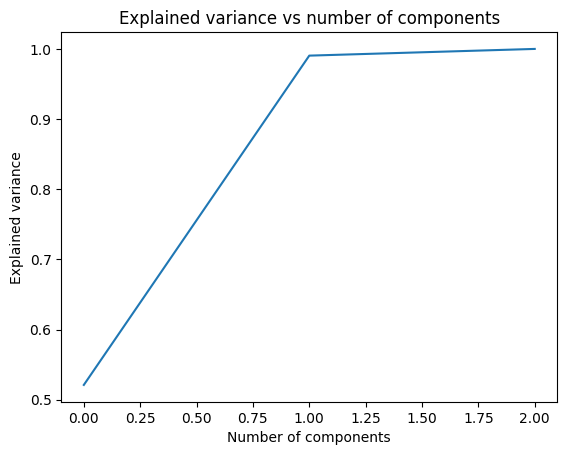

(3, 2)


In [8]:
# Get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
print("Explained variance ", explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative variance ", cumulative_variance)

# Plot explained variance
plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
plt.title("Explained variance vs number of components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

## We will 2 components
n_comp = 2
eig_vec = eig_vec[:,:n_comp]
print(eig_vec.shape)

## 8. Project data

In [9]:
# Take transpose of eigen vectors with data
pca_data = mean_data.dot(eig_vec)
print("Transformed data ", pca_data.shape)

Transformed data  (1000, 2)


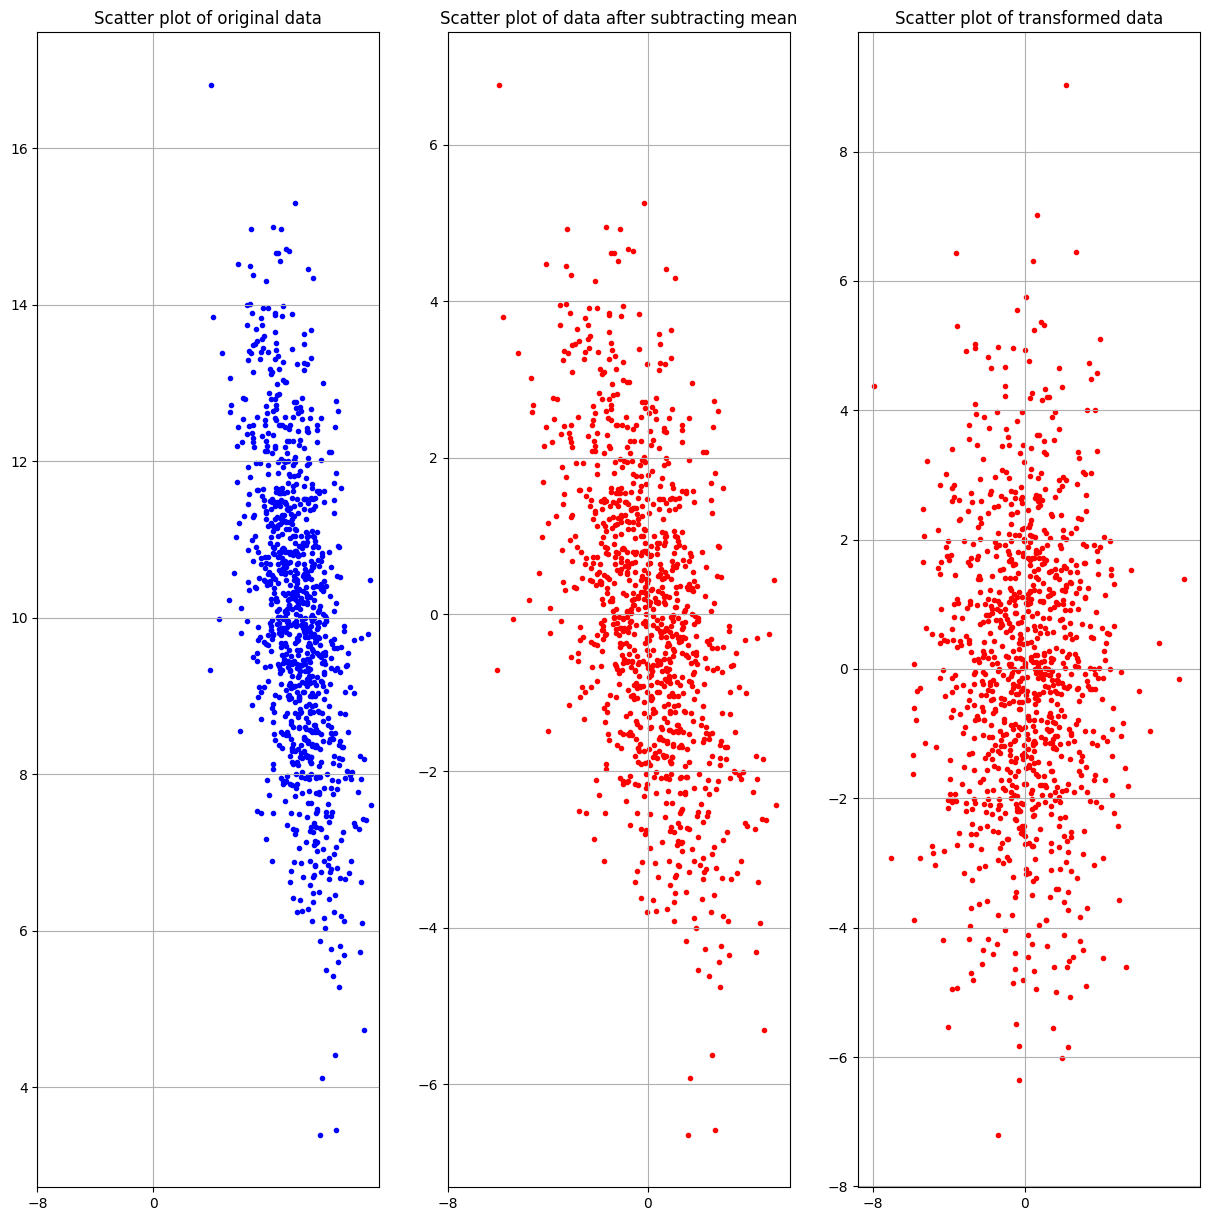

In [10]:
# Plot data

fig, ax = plt.subplots(1,3, figsize= (15,15))
# Plot original data
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

# Plot data after subtracting mean from data
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

# Plot data after subtracting mean from data
ax[2].scatter(pca_data[:,0], pca_data[:,1], color='red', marker='.')

# Set title
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of transformed data")

# Set x ticks
ax[0].set_xticks(np.arange(-8, 1, 8))
ax[1].set_xticks(np.arange(-8, 1, 8))
ax[2].set_xticks(np.arange(-8, 1, 8))

# Set grid to 'on'
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')

major_axis = eig_vec[:,0].flatten()
xmin = np.amin(pca_data[:,0])
xmax = np.amax(pca_data[:,0])
ymin = np.amin(pca_data[:,1])
ymax = np.amax(pca_data[:,1])

plt.show()
plt.close('all')

## 9. Invert PCA/ Reconstruct data from N components

In [11]:
# Reverse PCA transformation
recon_data = pca_data.dot(eig_vec.T) + mean
print(recon_data.shape)

(1000, 3)


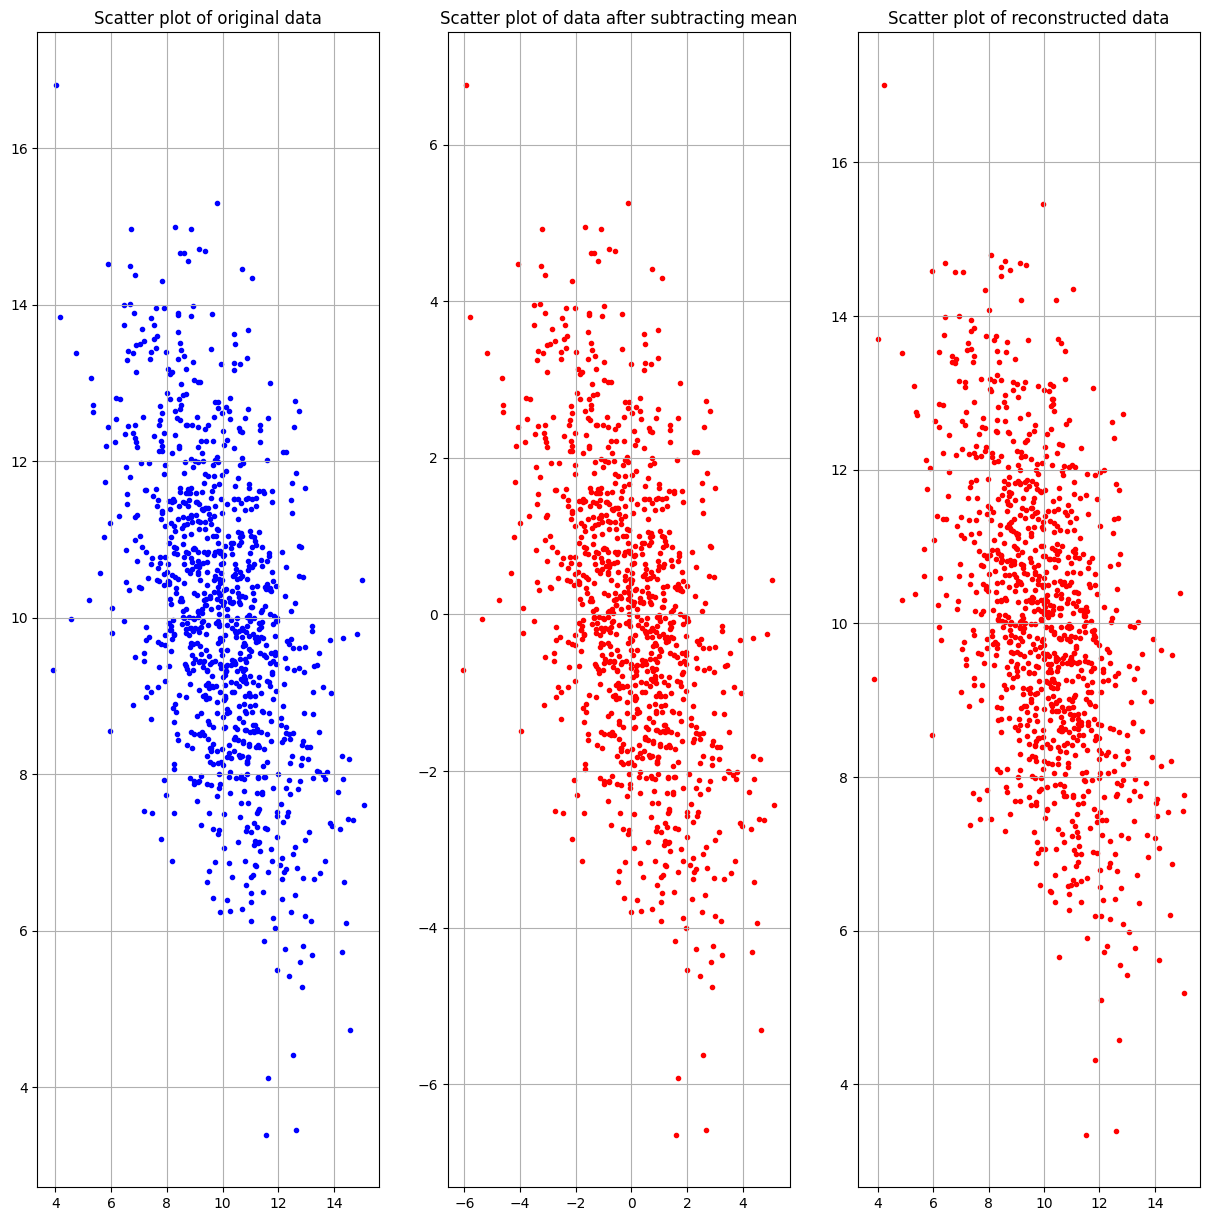

In [12]:

# Plot reconstructed data

fig, ax = plt.subplots(1,3, figsize= (15, 15))
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')
ax[2].scatter(recon_data[:,0], recon_data[:,1], color='red', marker='.')
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of reconstructed data")
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')
plt.show()

## 10. Reconstruction loss

In [13]:
# Compute reconstruction loss
loss = np.mean(np.square(recon_data - org_data))
print("Reconstruction loss ", loss)

Reconstruction loss  0.03320456423090925
